<a href="https://colab.research.google.com/github/biapeabody/Projeto1_AnaliseDados_Vendas_Kaggle/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📣 **Mini Projeto: Insights Orientados a Dados**

🔍 **Módulo 01 – Exploração e Visualização de Dados com Python**  
👩‍🎓 **Aluna:** Ana Beatriz Torres Neri  
👥 **Grupo:** DADOS_3_10

Este notebook faz parte do projeto disponível no GitHub:  
🔗 [https://github.com/biapeabody/Projeto1_AnaliseDados_Vendas_Kaggle](https://github.com/biapeabody/Projeto1_AnaliseDados_Vendas_Kaggle)


---

# 📊 **Amostra de Dados de Vendas - Kaggle**
[Kaggle - Sample Sales Data](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data)

Essas **bibliotecas** são fundamentais para a análise de dados em **Python**:

*   **Pandas:** permite carregar, manipular e transformar dados tabulares com facilidade.
*   **Matplotlib:** usada para construir gráficos e visualizar tendências nos dados.

*   **NumPy:** fornece suporte para operações numéricas de alta performance.






In [149]:
import pandas as pd              # biblioteca para manipulação e análise de dados tabulares (DataFrames)
import seaborn as sns            # biblioteca de visualização de dados baseada em Matplotlib
import matplotlib.pyplot as plt  # biblioteca para criação de visualizações estáticas (gráficos)
import numpy as np               # biblioteca para operações numéricas e matriciais

Aqui, os dados foram carregados a partir de um arquivo **.csv** utilizando o ***pandas***.
O parâmetro `encoding='latin1'` foi utilizado para evitar erros de leitura de caracteres especiais (como acentos), comuns em arquivos com codificação diferente do padrão **UTF-8**.

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
df = pd.read_csv('/content/drive/MyDrive/Projeto Desenvolve - Kaggle/sales_data_sample_kaggle.csv', encoding='latin1')


In [152]:
pd.set_option('display.max_columns', None) # configura o Pandas para exibir todas as colunas do DataFrame
df.head()                                  # exibe as primeiras 5 linhas do DataFrame

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [153]:
# verifica o número total de elementos no DataFrame (linhas x colunas)

print("Número de linhas =", df.shape[0])

print("\nNúmero de colunas =", df.shape[1])

print("\nTamanho total de elementos =", df.size)


Número de linhas = 2823

Número de colunas = 25

Tamanho total de elementos = 70575


In [154]:
# exibe informações gerais sobre o DataFrame: colunas, tipos de dados e valores nulos

print("\nInformações da estrutura da base:")
df.info()


Informações da estrutura da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESS

* df.describe() retorna um DataFrame com os valores
estatísticos.

* .round(2) arredonda todos os números para duas casas decimais.

In [155]:
# exibe estatísticas descritivas para as colunas numéricas com duas casas decimais

print("\nEstatísticas descritivas:")

df.describe().round(2) # 2 casas decimais


Estatísticas descritivas:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00
mean,10258.73,35.09,83.66,6.47,3553.89,2.72,7.09,2003.82,100.72
std,92.09,9.74,20.17,4.23,1841.87,1.20,3.66,0.70,40.19
min,10100.00,6.00,26.88,1.00,482.13,1.00,1.00,2003.00,33.00
25%,10180.00,27.00,68.86,3.00,2203.43,2.00,4.00,2003.00,68.00
50%,10262.00,35.00,95.70,6.00,3184.80,3.00,8.00,2004.00,99.00
75%,10333.50,43.00,100.00,9.00,4508.00,4.00,11.00,2004.00,124.00
max,10425.00,97.00,100.00,18.00,14082.80,4.00,12.00,2005.00,214.00


# **🧼 Limpeza dos Dados - Data Cleaning**

In [156]:
!pip install unidecode
import unidecode

**Criação de cópia para análise + Padronização de colunas**

Por entendimento de boas práticas, foi criada uma cópia do DataFrame original (`df_analise`) para realizar os tratamentos e análises exploratórias.  
Os nomes das colunas foram padronizados para:

- letras minúsculas
- sem acentos
- espaços substituídos por underlines
- compatíveis com Python (ex: `df_analise.coluna_exemplo`)


In [157]:
# criando uma cópia do DataFrame original para análise
# aplicação de boa prática
df_analise = df.copy()

# padroniza os nomes das colunas da cópia
def padronizar_colunas(df):
    colunas_limpas = []
    for col in df.columns:
        col = col.strip()
        col = unidecode.unidecode(col)
        col = col.lower()
        col = col.replace(" ", "_")
        col = col.replace("-", "_")
        colunas_limpas.append(col)
    df.columns = colunas_limpas
    return df

# aplica a função à cópia
df_analise = padronizar_colunas(df_analise)

# visualiza as 5 primeiras linhas da base limpa
df_analise.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Tradução dos nomes das colunas**

Para facilitar a leitura e adequar os dados ao idioma da análise, os nomes das colunas foram traduzidos do inglês para o português. A tradução foi feita apenas na cópia `df_analise`, mantendo o `df` original intacto.


In [158]:
# exibe todos os nomes das colunas do DataFrame com numeração

for i, col in enumerate(df_analise.columns):
    print(f"{i+1}. {col}")

1. ordernumber
2. quantityordered
3. priceeach
4. orderlinenumber
5. sales
6. orderdate
7. status
8. qtr_id
9. month_id
10. year_id
11. productline
12. msrp
13. productcode
14. customername
15. phone
16. addressline1
17. addressline2
18. city
19. state
20. postalcode
21. country
22. territory
23. contactlastname
24. contactfirstname
25. dealsize


**Tradução dos Nomes das Colunas**

Nesta etapa, foi criado um dicionário para traduzir os nomes das colunas do inglês para o português, adotando uma padronização com letras minúsculas e separação por underlines (`snake_case`).

A tradução foi aplicada somente no DataFrame `df_analise`, preservando o `df` original sem alterações.

Essa prática melhora a legibilidade da base de dados e facilita a manipulação nas próximas etapas da análise.


In [159]:
colunas_traduzidas = {
    'ordernumber': 'numero_pedido',
    'quantityordered': 'quantidade_pedida',
    'priceeach': 'preco_unitario',
    'orderlinenumber': 'numero_linha_pedido',
    'sales': 'valor_vendas',
    'orderdate': 'data_pedido',
    'status': 'status',
    'qtr_id': 'trimestre',
    'month_id': 'mes',
    'year_id': 'ano',
    'productline': 'linha_produto',
    'msrp': 'preco_sugerido',
    'productcode': 'codigo_produto',
    'customername': 'nome_cliente',
    'phone': 'telefone',
    'addressline1': 'endereco_1',
    'addressline2': 'endereco_2',
    'city': 'cidade',
    'state': 'estado',
    'postalcode': 'cep',
    'country': 'pais',
    'territory': 'territorio',
    'contactlastname': 'sobrenome_contato',
    'contactfirstname': 'nome_contato',
    'dealsize': 'porte_negocio'
}

In [160]:
# aplica a tradução das colunas ao DataFrame de análise

df_analise = df_analise.rename(columns=colunas_traduzidas)

In [161]:
list(df_analise.columns)

['numero_pedido',
 'quantidade_pedida',
 'preco_unitario',
 'numero_linha_pedido',
 'valor_vendas',
 'data_pedido',
 'status',
 'trimestre',
 'mes',
 'ano',
 'linha_produto',
 'preco_sugerido',
 'codigo_produto',
 'nome_cliente',
 'telefone',
 'endereco_1',
 'endereco_2',
 'cidade',
 'estado',
 'cep',
 'pais',
 'territorio',
 'sobrenome_contato',
 'nome_contato',
 'porte_negocio']

**Conversão da coluna `data_pedido` para formato brasileiro**

### 🗓️ Conversão e Formatação da Coluna de Data

Nesta etapa, conversão da coluna `data_pedido` que estava em formato texto para o tipo datetime,  
informando explicitamente que o formato original é mês/dia/ano com horário (`%m/%d/%Y %H:%M`).

Depois, foi removida a parte de horário para trabalhar apenas com a data (dia, mês e ano), conforme padrão brasileiro.


In [162]:
# 10 primeiras linhas da coluna data_pedido

df_analise['data_pedido'].head(10)


,data_pedido
0,2/24/2003 0:00
1,5/7/2003 0:00
2,7/1/2003 0:00
3,8/25/2003 0:00
4,10/10/2003 0:00
5,10/28/2003 0:00
6,11/11/2003 0:00
7,11/18/2003 0:00
8,12/1/2003 0:00
9,1/15/2004 0:00


In [163]:
# converte a coluna 'data_pedido' para datetime, informando que o formato original é mês/dia/ano

df_analise['data_pedido'] = pd.to_datetime(df_analise['data_pedido'], format='%m/%d/%Y %H:%M')

# remove a parte de horário, mantendo apenas a data (ano, mês e dia)

df_analise['data_pedido'] = df_analise['data_pedido'].dt.date

# exibe a coluna 'data_pedido' no formato brasileiro (dd-mm-aaaa) apenas para visualização
# sem alterar o valor original armazenado como datetime.date
df_analise['data_pedido'].apply(lambda x: x.strftime('%d-%m-%Y')).head()


,data_pedido
0,24-02-2003
1,07-05-2003
2,01-07-2003
3,25-08-2003
4,10-10-2003


### **Remoção de Colunas Irrelevantes**

Algumas colunas presentes na base original foram removidas por não contribuírem diretamente para os objetivos da análise, como telefone, endereço completo e contatos individuais.  


In [164]:
# remove colunas que não são relevantes para a análise de vendas

colunas_para_remover = ['telefone', 'endereco_1', 'endereco_2', 'cep', 'sobrenome_contato', 'nome_contato']
df_analise.drop(columns=colunas_para_remover, inplace=True)


###**Verificação de Valores Ausentes**

A tabela abaixo mostra a quantidade e o percentual de dados ausentes em cada coluna, com destaque visual para colunas mais críticas.


In [165]:
# Percentuais
percent_estado = df_analise['estado'].isnull().mean() * 100
percent_territorio = df_analise['territorio'].isnull().mean() * 100

# Cria DataFrame de nulos
isnull = pd.DataFrame(df_analise.isnull().sum(), columns=['total_nulos'])

# Cria coluna percentual formatada como string com 2 casas decimais e símbolo %
isnull['percentual'] = ((isnull['total_nulos'] / df_analise.shape[0]) * 100).map(lambda x: f"{x:.2f}%")

# Filtra colunas com nulos
isnull = isnull[isnull['total_nulos'] > 0]

# Estilização para destaque visual
isnull.style.background_gradient(cmap='Blues')

,total_nulos,percentual
estado,1486,52.64%
territorio,1074,38.04%


### **Tratamento de Valores Ausentes: Estado e Território**

As colunas `estado` e `territorio` apresentavam valores ausentes.  
Optamos por preencher esses campos com valores padrão — "Não informado" e "Indefinido" — para manter a integridade dos registros e permitir análises mais completas, sem excluir dados relevantes.


In [166]:
# substitui valores nulos por um texto padrão

df_analise['estado'] = df_analise['estado'].fillna('Não informado')

df_analise['territorio'] = df_analise['territorio'].fillna('Indefinido')

In [167]:
print(df_analise['estado'].isnull().sum(), 'estados nulos')
print(df_analise['territorio'].isnull().sum(), 'territórios nulos')

# Percentuais
print((df_analise['estado'].isnull().mean() * 100).round(2), '% de estados nulos')

print((df_analise['territorio'].isnull().mean() * 100).round(2), '% de territórios nulos')

0 estados nulos
0 territórios nulos
0.0 % de estados nulos
0.0 % de territórios nulos


### 🌍 **Padronização da Coluna 'território'**

Alguns países na base apresentavam valores ausentes ou inconsistentes na coluna `territorio`, como "Indefinido" ou classificações conflitantes. Para garantir a qualidade dos dados:

- Listamos os pares únicos de país e território.
- Criamos um dicionário (`pais_territorio_map`) para mapear corretamente cada país à sua respectiva região geográfica.
- Substituímos valores ausentes com base nesse dicionário.
- Validamos a consistência com uma tabela de frequências país × território.

Essa etapa é essencial para permitir análises corretas por região, como participação de vendas por território.

In [168]:
# Exibe pares únicos de país e território
df_analise[['pais', 'territorio']].drop_duplicates().sort_values(by='pais')

,pais,territorio
10,Australia,APAC
20,Austria,EMEA
119,Belgium,EMEA
35,Canada,Indefinido
106,Denmark,EMEA
16,Finland,EMEA
1,France,EMEA
168,Germany,EMEA
196,Ireland,EMEA
41,Italy,EMEA


In [169]:
pais_territorio_map = {
    'Australia': 'APAC',
    'Austria': 'EMEA',
    'Belgium': 'EMEA',
    'Canada': 'NA',
    'Denmark': 'EMEA',
    'Finland': 'EMEA',
    'France': 'EMEA',
    'Germany': 'EMEA',
    'Ireland': 'EMEA',
    'Italy': 'EMEA',
    'Japan': 'APAC',           # atualizado para manter consistência
    'Norway': 'EMEA',
    'Philippines': 'APAC',     # atualizado para seguir mesma lógica
    'Singapore': 'APAC',       # unificado
    'Spain': 'EMEA',
    'Sweden': 'EMEA',
    'Switzerland': 'EMEA',
    'UK': 'EMEA',
    'USA': 'NA'
}

In [170]:
# contagem de registros por território e país
df_analise.groupby(['pais', 'territorio']).size().reset_index(name='quantidade').sort_values(by='quantidade', ascending=False)

,pais,territorio,quantidade
19,USA,Indefinido,1004
15,Spain,EMEA,342
6,France,EMEA,314
0,Australia,APAC,185
18,UK,EMEA,144
9,Italy,EMEA,113
5,Finland,EMEA,92
11,Norway,EMEA,85
3,Canada,Indefinido,70
4,Denmark,EMEA,63


In [171]:
# agrupamento de valor total de vendas por território
vendas_por_territorio = df_analise.groupby('territorio')['valor_vendas'].sum().sort_values(ascending=False)

# exibição em formato de DataFrame para melhor visualização
vendas_por_territorio_df = vendas_por_territorio.reset_index()
vendas_por_territorio_df

,territorio,valor_vendas
0,EMEA,4979272.41
1,Indefinido,3852061.39
2,APAC,746121.83
3,Japan,455173.22


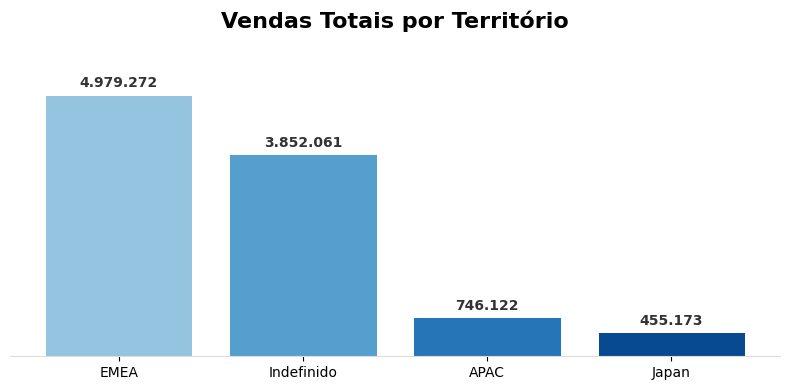

In [172]:
plt.style.use('default')  # Fundo branco, estilo clean

x = vendas_por_territorio_df['territorio']
y = vendas_por_territorio_df['valor_vendas']

# Cores em tons sequenciais (valores maiores = cores mais escuras)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(x)))

plt.figure(figsize=(8, 4))
bars = plt.bar(x, y, color=colors, edgecolor='white', linewidth=0.7)

# Título em negrito
plt.title('Vendas Totais por Território', fontsize=16, fontweight='bold', pad=20)

# Remover TODOS os elementos do eixo Y (linha, ticks e labels)
plt.gca().yaxis.set_visible(False)  # Isso já remove os ticks
plt.gca().spines['left'].set_visible(False)  # Remove a linha do eixo y esquerdo

# Remover outras bordas desnecessárias
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)
plt.gca().spines['bottom'].set_color('#DDDDDD')  # Linha sutil na base

# Rótulos de dados formatados como valor monetário
for bar in bars:
    height = bar.get_height()
    formatted_value = f'{height:,.0f}'.replace(',', '.')  # Formato: 1.000
    plt.annotate(
        formatted_value,
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # Pequeno offset vertical
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='#333333'
    )

# Ajustar limite superior para os rótulos
plt.ylim(0, max(y) * 1.15)

# Ajustar margens para evitar corte
plt.tight_layout()
plt.show()

## 📅 Melhor Ano em Termos de Vendas

Avaliamos o desempenho anual de vendas ao agrupar os dados pela coluna `ano` e somar os valores correspondentes.

Essa análise nos permite identificar o ano com maior volume de vendas, possibilitando comparações estratégicas e avaliação de sazonalidades em nível anual.

*   *Qual é o melhor ano em termos de vendas?*




---






In [173]:
# Total de vendas por ano
total_vendas = df_analise.groupby('ano')['valor_vendas'].sum()

# Total de pedidos por ano
qtd_pedidos = df_analise.groupby('ano')['numero_pedido'].nunique()

# Média de vendas por pedido
media_por_pedido = (total_vendas / qtd_pedidos).round(2)

# Junta tudo em um DataFrame
resumo_ano = pd.DataFrame({
    'total_vendas': total_vendas,
    'qtd_pedidos': qtd_pedidos,
    'media_por_pedido': media_por_pedido
}).reset_index()

resumo_ano

,ano,total_vendas,qtd_pedidos,media_por_pedido
0,2003,3516979.54,104,33817.11
1,2004,4724162.60,144,32806.68
2,2005,1791486.71,59,30364.18


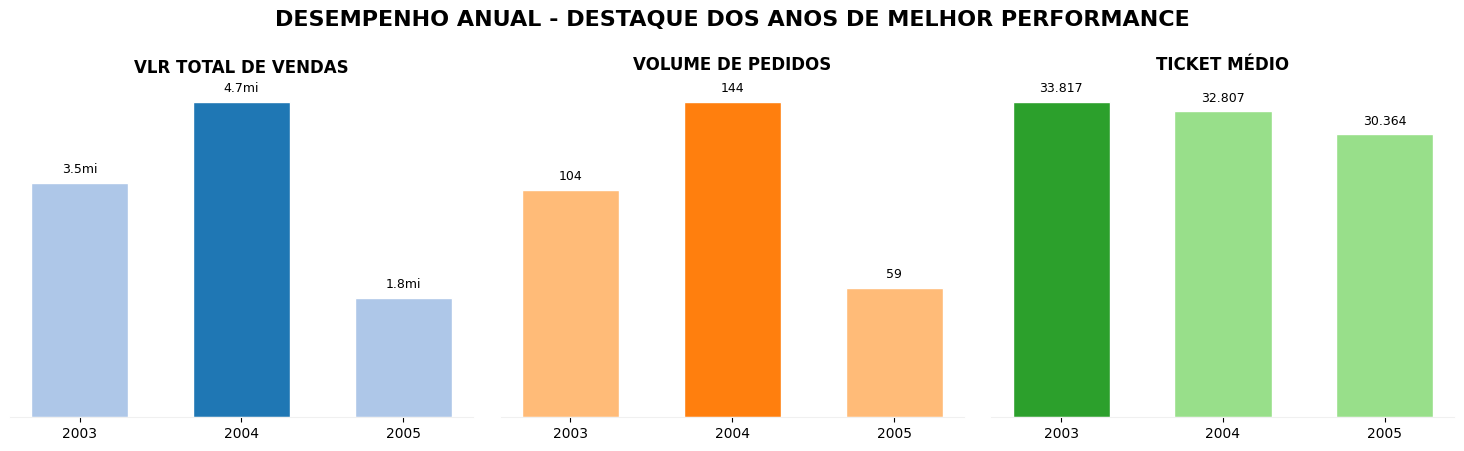

In [174]:
# Configuração de estilo
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
fig, axs = plt.subplots(1, 3, figsize=(15, 4.5), facecolor='white')

# Cores base e versões claras
colors = {
    'azul': {'base': '#1f77b4', 'claro': '#aec7e8'},
    'laranja': {'base': '#ff7f0e', 'claro': '#ffbb78'},
    'verde': {'base': '#2ca02c', 'claro': '#98df8a'}
}

# Função para destacar o valor máximo
def highlight_max(values, base_color, light_color):
    max_idx = values.idxmax()
    return [base_color if i == max_idx else light_color for i in range(len(values))]

# --- Gráfico 1: Total de Vendas ---
bar_colors = highlight_max(resumo_ano['total_vendas'], colors['azul']['base'], colors['azul']['claro'])
axs[0].bar(resumo_ano['ano'], resumo_ano['total_vendas'],
          color=bar_colors, width=0.6, edgecolor='white')
axs[0].set_title('VLR TOTAL DE VENDAS', fontweight='bold', pad=10)
axs[0].set_xticks(resumo_ano['ano'])

# --- Gráfico 2: Quantidade de Pedidos ---
bar_colors = highlight_max(resumo_ano['qtd_pedidos'], colors['laranja']['base'], colors['laranja']['claro'])
axs[1].bar(resumo_ano['ano'], resumo_ano['qtd_pedidos'],
          color=bar_colors, width=0.6, edgecolor='white')
axs[1].set_title('VOLUME DE PEDIDOS', fontweight='bold', pad=12)
axs[1].set_xticks(resumo_ano['ano'])

# --- Gráfico 3: Média por Pedido ---
bar_colors = highlight_max(resumo_ano['media_por_pedido'], colors['verde']['base'], colors['verde']['claro'])
axs[2].bar(resumo_ano['ano'], resumo_ano['media_por_pedido'],
          color=bar_colors, width=0.6, edgecolor='white')
axs[2].set_title('TICKET MÉDIO', fontweight='bold', pad=12)
axs[2].set_xticks(resumo_ano['ano'])

# Configurações comuns
for ax in axs:
    ax.yaxis.set_visible(False)
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_color('#f0f0f0')
    ax.grid(axis='y', linestyle=':', alpha=0.3, color='#f0f0f0')
    ax.set_facecolor('white')

    # Adicionar valores nas barras
    for i, p in enumerate(ax.patches):
        if ax == axs[0]:
            value = f'{p.get_height()/1e6:,.1f}mi'.replace(',','.')
        elif ax == axs[2]:
            value = f'{p.get_height():,.0f}'.replace(',','.')
        else:
            value = f'{p.get_height():,.0f}'.replace(',','.')

        # Destacar texto do valor máximo
        fontweight = 'bold' if p.get_facecolor() == colors[list(colors.keys())[axs.tolist().index(ax)]]['base'] else 'normal'

        ax.annotate(value,
                   (p.get_x() + p.get_width()/2, p.get_height()),
                   ha='center', va='bottom',
                   xytext=(0,5), textcoords='offset points',
                   fontsize=9, fontweight=fontweight)

plt.tight_layout(pad=2)
fig.subplots_adjust(top=0.85)
fig.suptitle('DESEMPENHO ANUAL - DESTAQUE DOS ANOS DE MELHOR PERFORMANCE',
            fontsize=16, fontweight='bold', y=1.02)

plt.show()

## **Melhor Trimestre por Linha de Produto em Cada Ano**

Nesta análise, buscamos identificar **em qual trimestre do ano cada linha de produto teve o maior volume de vendas**.

Esse tipo de observação permite descobrir **sazonalidades específicas**, ajudando a entender em quais períodos do ano cada categoria de produto tem melhor desempenho.


In [175]:
vendas_por_trimestre_ano = (
    df_analise
    .groupby(['linha_produto', 'ano', 'trimestre'])['valor_vendas']
    .sum()
    .reset_index()
)

In [176]:
melhor_trimestre_por_ano = (
    vendas_por_trimestre_ano.loc[
        vendas_por_trimestre_ano.groupby(['linha_produto', 'ano'])['valor_vendas'].idxmax()
    ]
    .sort_values(['linha_produto', 'ano'])
    .reset_index(drop=True)
)

melhor_trimestre_por_ano

,linha_produto,ano,trimestre,valor_vendas
0,Classic Cars,2003,4,829663.49
1,Classic Cars,2004,4,697786.08
2,Classic Cars,2005,1,376625.66
3,Motorcycles,2003,4,199013.03
4,Motorcycles,2004,4,211972.80
5,Motorcycles,2005,1,135695.61
6,Planes,2003,4,130434.97
7,Planes,2004,4,220104.39
8,Planes,2005,1,122037.73
9,Ships,2003,4,115155.17


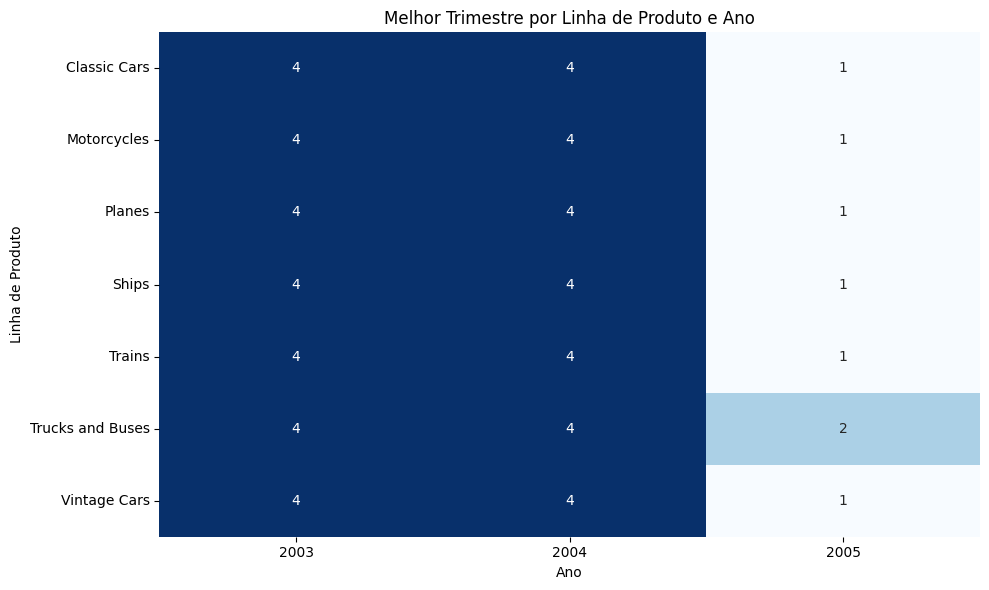

In [177]:
# Cria uma matriz: linha_produto x ano, com os trimestres
heatmap_data = melhor_trimestre_por_ano.pivot(
    index='linha_produto',
    columns='ano',
    values='trimestre'
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues', cbar=False)

plt.title('Melhor Trimestre por Linha de Produto e Ano')
plt.xlabel('Ano')
plt.ylabel('Linha de Produto')
plt.tight_layout()
plt.show()


## **Análise dos Produtos Mais Vendidos**

Nesta seção, analisamos os produtos com maior volume de vendas a partir de duas abordagens:

1. **🔝 Top 10 produtos mais vendidos no geral**:  
   Aqui, avaliamos os produtos com maior valor de vendas somando todos os pedidos, independentemente da linha de produto.

2. **🏆 Produto mais vendido por linha de produto**:  
   Identificamos qual produto, dentro de cada categoria (linha de produto), gerou o maior valor em vendas.

In [178]:
# valor total de vendas por linha de produto e código
vendas_linha_produto = (
    df_analise
    .groupby(['linha_produto', 'codigo_produto'])['valor_vendas']
    .sum()
    .reset_index()
)
vendas_linha_produto

,linha_produto,codigo_produto,valor_vendas
0,Classic Cars,S10_1949,191073.03
1,Classic Cars,S10_4757,113093.73
2,Classic Cars,S10_4962,127548.16
3,Classic Cars,S12_1099,137177.01
4,Classic Cars,S12_1108,168585.32
...,...,...,...
104,Vintage Cars,S24_3816,70170.62
105,Vintage Cars,S24_3969,33181.66
106,Vintage Cars,S24_4258,94279.04
107,Vintage Cars,S32_4289,61302.82


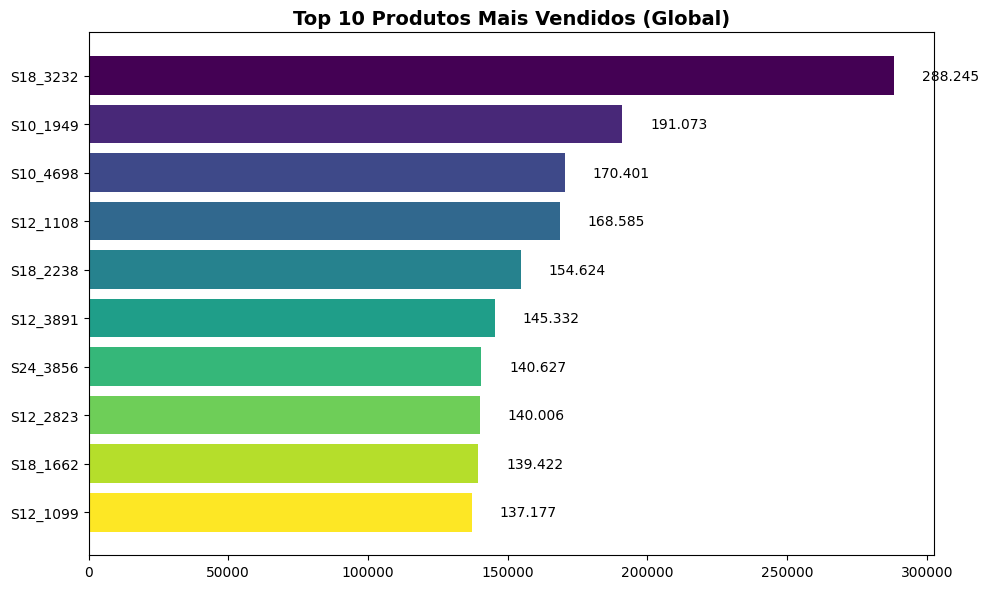

In [179]:
# Top 10 produtos por valor total de vendas
top_10_produtos = (
    vendas_linha_produto
    .groupby('codigo_produto')['valor_vendas']
    .sum()
    .reset_index()
    .sort_values(by='valor_vendas', ascending=False)
    .head(10)
)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_produtos)))
bars = plt.barh(top_10_produtos['codigo_produto'], top_10_produtos['valor_vendas'], color=colors)
plt.title('Top 10 Produtos Mais Vendidos (Global)', fontweight='bold', fontsize=14)
#plt.xlabel('Valor Total de Vendas')
plt.gca().invert_yaxis()

# Rótulos nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f'{width:,.0f}'.replace(',', '.'), va='center', fontsize=10)

plt.tight_layout()
plt.show()


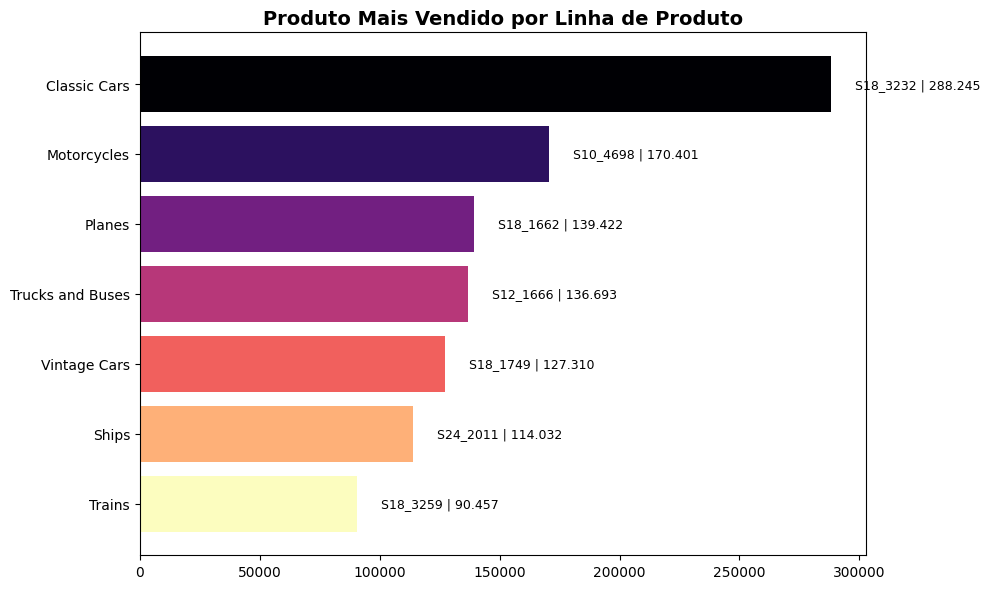

In [180]:
# Produto mais vendido dentro de cada linha
mais_vendido_por_linha = (
    vendas_linha_produto.loc[
        vendas_linha_produto.groupby('linha_produto')['valor_vendas'].idxmax()
    ]
    .sort_values(by='valor_vendas', ascending=False)
    .reset_index(drop=True)
)

# Gráfico horizontal
plt.figure(figsize=(10, 6))
colors = plt.cm.magma(np.linspace(0, 1, len(mais_vendido_por_linha)))
bars = plt.barh(mais_vendido_por_linha['linha_produto'], mais_vendido_por_linha['valor_vendas'], color=colors)
plt.title('Produto Mais Vendido por Linha de Produto', fontweight='bold', fontsize=14)
#plt.xlabel('Valor Total de Vendas')
plt.gca().invert_yaxis()

# Rótulos com código + valor
for bar, (_, row) in zip(bars, mais_vendido_por_linha.iterrows()):
    width = bar.get_width()
    label = f"{row['codigo_produto']} | {row['valor_vendas']:,.0f}".replace(',', '.')
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2, label,
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


## **Análise por Porte de Negócio**

Nesta visualização, avaliamos o total de vendas gerado por empresas de portes distintos. O objetivo é identificar se empresas de determinado porte movimentam mais receita.


In [181]:
df_analise['porte_negocio'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [182]:
vendas_por_porte = (
    df_analise
    .groupby('porte_negocio')['valor_vendas']
    .sum()
    .reset_index()
    .sort_values(by='valor_vendas', ascending=False)
)
vendas_por_porte

,porte_negocio,valor_vendas
1,Medium,6087432.24
2,Small,2643077.35
0,Large,1302119.26


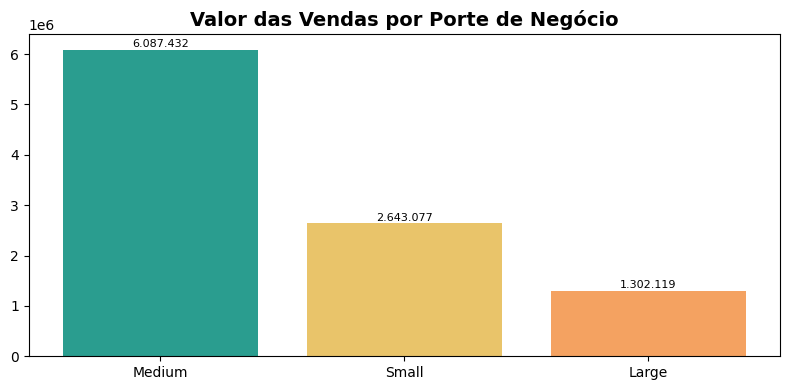

In [183]:
plt.figure(figsize=(8, 4))
colors = ['#2a9d8f', '#e9c46a', '#f4a261']

bars = plt.bar(vendas_por_porte['porte_negocio'], vendas_por_porte['valor_vendas'], color=colors)

plt.title('Valor das Vendas por Porte de Negócio', fontsize=14, fontweight='bold')
#plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=0)

# Rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5000, f'{height:,.0f}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Qual é a média de vendas por pedido em cada porte de negócio?**

Essa métrica ajuda a entender **o ticket médio de cada perfil de cliente**.

In [184]:
# Total de vendas por pedido
vendas_por_pedido = df_analise.groupby(['porte_negocio', 'numero_pedido'])['valor_vendas'].sum().reset_index()

# Média por porte
media_por_porte = vendas_por_pedido.groupby('porte_negocio')['valor_vendas'].mean().reset_index()
media_por_porte.columns = ['porte_negocio', 'media_venda_por_pedido']
media_por_porte = media_por_porte.sort_values(by='media_venda_por_pedido', ascending=False)

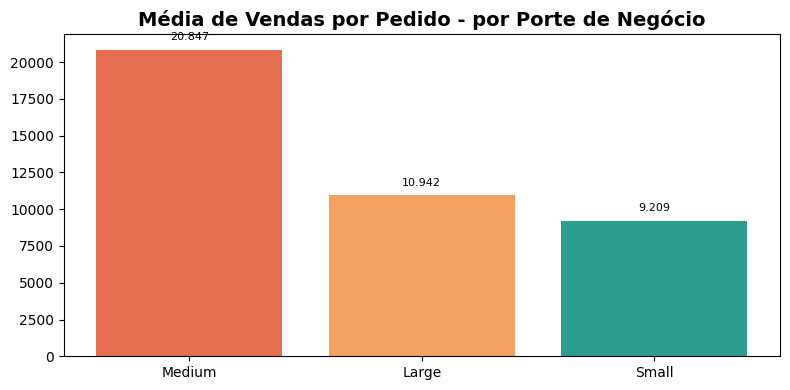

In [185]:
plt.figure(figsize=(8, 4))
colors = ['#e76f51', '#f4a261', '#2a9d8f']

bars = plt.bar(media_por_porte['porte_negocio'], media_por_porte['media_venda_por_pedido'], color=colors)

plt.title('Média de Vendas por Pedido - por Porte de Negócio', fontsize=14, fontweight='bold')
#plt.ylabel('Média de Vendas por Pedido')
plt.xticks(rotation=0)

# Rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{height:,.0f}'.replace(',', '.'),
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Top 10 Clientes por Valor de Vendas

Esta análise identifica os **principais clientes** da base, considerando o valor total gerado em pedidos.


In [186]:
clientes_top = (
    df_analise
    .groupby('nome_cliente')['valor_vendas']
    .sum()
    .reset_index()
    .sort_values(by='valor_vendas', ascending=False)
)

clientes_top.head(10)  # top 10 clientes


,nome_cliente,valor_vendas
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90
31,"Dragon Souveniers, Ltd.",172989.68
45,Land of Toys Inc.,164069.44
81,The Sharp Gifts Warehouse,160010.27
0,"AV Stores, Co.",157807.81
3,"Anna's Decorations, Ltd",153996.13


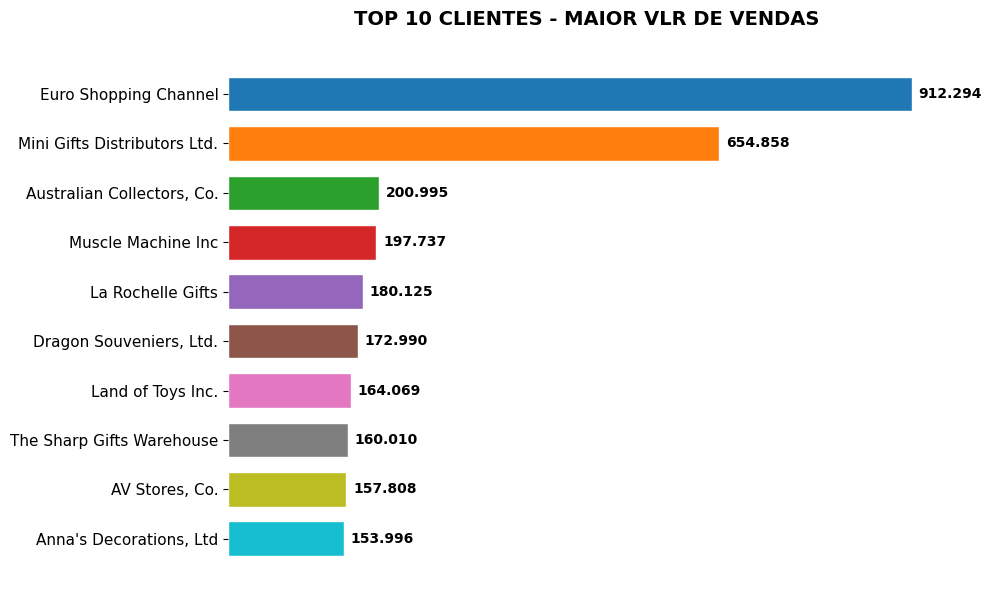

In [187]:
plt.figure(figsize=(10, 6))
top_10_clientes = clientes_top.head(10)


#colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_10_clientes)))
colors = plt.cm.tab10(np.linspace(0, 1, len(top_10_clientes)))

bars = plt.barh(top_10_clientes['nome_cliente'], top_10_clientes['valor_vendas'],
                color=colors, edgecolor='white', height=0.7)

plt.title('TOP 10 CLIENTES - MAIOR VLR DE VENDAS',
          fontsize=14, fontweight='bold', pad=20)

# Remover eixos e bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=11)

# Adicionar valores formatados
max_value = top_10_clientes['valor_vendas'].max()
for bar in bars:
    width = bar.get_width()
    offset = max_value * 0.01  # Offset proporcional

    ax.text(width + offset,
            bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}'.replace(',', '.'),  # Formato monetário
            ha='left', va='center',
            fontsize=10, fontweight='bold')

ax.invert_yaxis()  # Maior valor no topo

plt.tight_layout()
plt.show()

## 🌍 Top Países por Valor de Vendas

Nesta análise, identificamos os países com maior volume de vendas totais.

- *Qual país teve o maior volume de vendas?*

In [188]:
vendas_por_pais = (
    df_analise
    .groupby('pais')['valor_vendas']
    .sum()
    .reset_index()
    .sort_values(by='valor_vendas', ascending=False)
)

vendas_por_pais.head(10)

,pais,valor_vendas
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


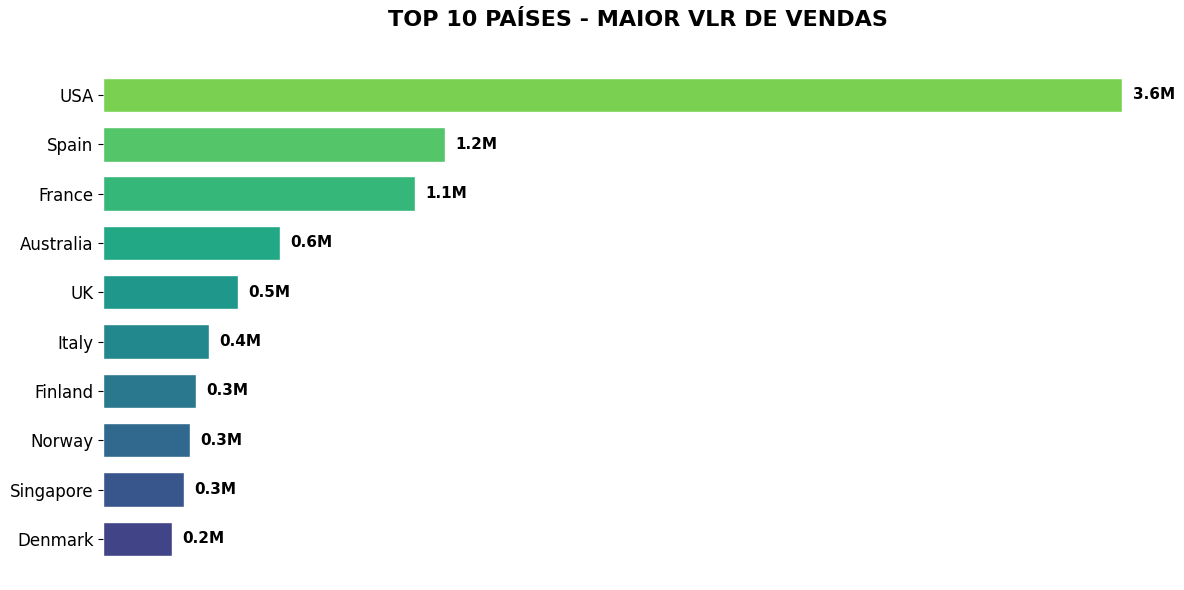

In [189]:
plt.figure(figsize=(12, 6))

# Selecionar os top 10 países
top_10_paises = vendas_por_pais.head(10)

# Paleta de cores profissionais (gradiente de verdes/azuis)
colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(top_10_paises)))
# Alternativa: plt.cm.plasma(np.linspace(0.2, 0.8, len(top_10_paises)))

# Criar o gráfico de barras
bars = plt.barh(top_10_paises['pais'], top_10_paises['valor_vendas'],
                color=colors, edgecolor='white', height=0.7, linewidth=1)

# Configurações do título
plt.title('TOP 10 PAÍSES - MAIOR VLR DE VENDAS',
          fontsize=16, fontweight='bold', pad=20)

# Remover elementos desnecessários
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=12)

# Adicionar valores formatados
max_value = top_10_paises['valor_vendas'].max()
for bar in bars:
    width = bar.get_width()
    plt.text(width + max_value*0.01,  # Offset proporcional
             bar.get_y() + bar.get_height()/2,
             f'{width/1e6:,.1f}M'.replace(',', '.'),  # Em milhões
             ha='left', va='center',
             fontsize=11, fontweight='bold')

# Ordenar do maior para o menor
ax.invert_yaxis()

plt.tight_layout()
plt.show()

# 📈 **Relatório Final de Análise de Vendas**



Neste projeto, explorei a base X, composta por **N linhas e Y colunas**, com dados relacionados a vendas por território, ano, cliente, porte de empresa, produto e outros atributos relevantes. Abaixo estão os principais insights extraídos da análise:

---

## 🌍 Vendas por Território

💰 O território com **maior volume de vendas** foi **EMEA**, com mais de 4,9 milhões em receita, seguido pela categoria "Indefinido", e depois pelos territórios **APAC** e **Japan**.

---

## 📆 Desempenho ao Longo dos Anos

- 📈 **2004 foi o ano de melhor desempenho**, tanto em **valor total de vendas (4,7 milhões)** quanto em **volume de pedidos (144)**.
- 🧾 O **ticket médio** apresentou variações leves entre os anos, com destaque para **2003**, que registrou o valor médio mais alto por pedido: **33.817**.

---

## 📦 Linhas de Produto

- A linha de produto **"Classic Cars" foi a mais lucrativa** e também apresentou forte **sazonalidade**, com destaque consistente no **4º trimestre** em 2003 e 2004.
- Em 2005, o desempenho da maioria das linhas caiu, com exceção de "Trucks and Buses", que teve seu melhor resultado no 2º trimestre.

---

## 🔝 Produtos em Destaque

- Os **produtos mais vendidos globalmente** foram:
  1. **S18_3232** – 288.245 unidades
  2. **S10_1949** – 191.073 unidades
  3. **S10_4698** – 170.401 unidades
- Entre as linhas, **cada uma tem um produto líder distinto**, com destaque para **Classic Cars** com o modelo **S18_3232**.

---

## 🏢 Porte de Negócio

- Empresas de **médio porte** geraram o **maior volume total de vendas** (acima de 6 milhões) e também apresentaram o **maior ticket médio por pedido**, cerca de **20.847**.
- Empresas grandes e pequenas ficaram atrás tanto em valor total quanto em ticket médio.

---

## 🌎 Vendas por País

- Os **países com maior valor de vendas** foram:
  1. **Estados Unidos** – 3,6 milhões
  2. **Espanha** – 1,2 milhão
  3. **França** – 1,1 milhão
- Nota-se uma forte **concentração de vendas em países desenvolvidos**.

---

## 👥 Principais Clientes

- O maior comprador individual foi **Euro Shopping Channel**, com mais de **912 mil em compras**.
- Em segundo lugar, vem **Mini Gifts Distributors Ltd.**, com aproximadamente **655 mil**.

---

## 🧠 Possíveis Perguntas para Investigar

- Quais fatores explicam a forte sazonalidade no 4º trimestre das principais linhas?
- Por que o desempenho em 2005 foi significativamente inferior aos anos anteriores?
- Há relação entre localização geográfica do cliente e ticket médio?
- Seria interessante promover produtos líderes de venda em mercados com menor penetração?

---

## 🎯 Conclusão

A análise revelou padrões claros de **desempenho anual, territorial e por perfil de cliente**, além de identificar **produtos estratégicos** e **linhas mais lucrativas**. Esses insights podem ser usados para melhorar ações comerciais, logística, segmentação e forecasting.

